In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [139]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv("/kaggle/input/stores-area-and-sales-data/Stores.csv")
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [140]:
df.shape

(896, 5)

Lets check for null values 

In [141]:
for i in df.columns:
    print(f"Number of null values in {i} : ", df[i].isna().sum())

Number of null values in Store ID  :  0
Number of null values in Store_Area :  0
Number of null values in Items_Available :  0
Number of null values in Daily_Customer_Count :  0
Number of null values in Store_Sales :  0


In [142]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [143]:
px.box(df)

In [144]:
all_outlier={}
for i in df.columns:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound = df[i].quantile(0.25) - (1.5*IQR)
    upper_bound = df[i].quantile(0.75) + (1.5*IQR)
    all_outlier[i] =[lower_bound, upper_bound]

In [145]:
all_outlier

{'Store ID ': [-446.5, 1343.5],
 'Store_Area': [811.625, 2158.625],
 'Items_Available': [964.625, 2593.625],
 'Daily_Customer_Count': [45.0, 1525.0],
 'Store_Sales': [8516.25, 109886.25]}

In [146]:
for i in df.columns:
    df.loc[df[i]>all_outlier[i][1], i] = all_outlier[i][1]
    df.loc[df[i]<all_outlier[i][0], i] = all_outlier[i][0]

In [147]:
px.box(df)

In [148]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.333845,1781.919782,786.344866,59344.125279
std,258.797218,249.598303,299.257882,265.150330,17168.248608
min,1.000000,811.625000,964.625000,45.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2158.625000,2593.625000,1525.000000,109886.250000


<AxesSubplot:>

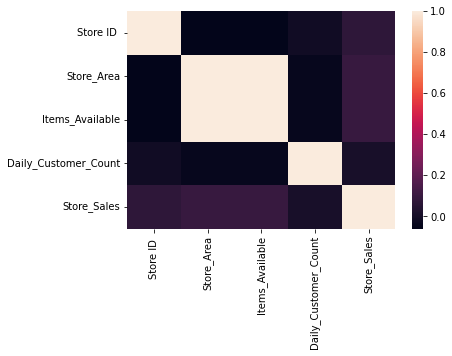

In [149]:
sns.heatmap(df.corr())

In [150]:
df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058857,-0.055846,-0.010491,0.071254
Store_Area,-0.058857,1.000000,0.998888,-0.040977,0.095937
Items_Available,-0.055846,0.998888,1.000000,-0.040558,0.097515
Daily_Customer_Count,-0.010491,-0.040977,-0.040558,1.000000,0.008311
Store_Sales,0.071254,0.095937,0.097515,0.008311,1.000000


In [151]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1.0,1659.0,1961.0,530,66490.0
1,2.0,1461.0,1752.0,210,39820.0
2,3.0,1340.0,1609.0,720,54010.0
3,4.0,1451.0,1748.0,620,53730.0
4,5.0,1770.0,2111.0,450,46620.0


In [152]:
px.scatter(df, x="Store_Area", y="Items_Available")

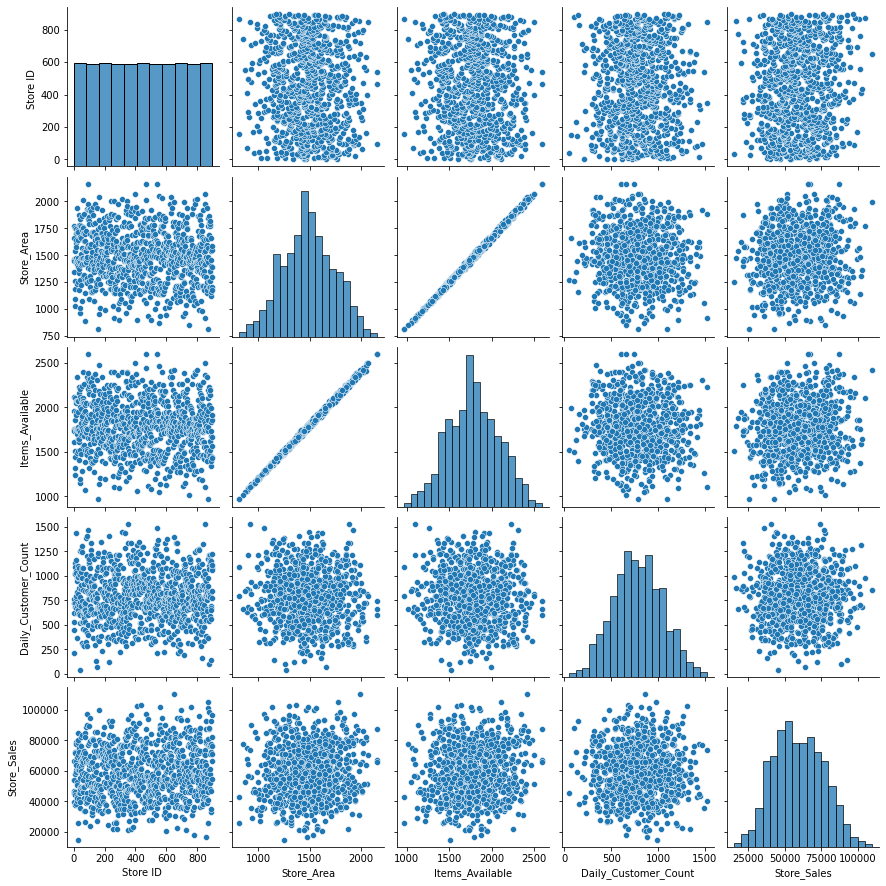

In [153]:
sns.pairplot(df)

In [154]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [155]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [156]:
x


,Store_Area,Items_Available,Daily_Customer_Count
0,1659.0,1961.0,530
1,1461.0,1752.0,210
2,1340.0,1609.0,720
3,1451.0,1748.0,620
4,1770.0,2111.0,450
...,...,...,...
891,1582.0,1910.0,1080
892,1387.0,1663.0,850
893,1200.0,1436.0,1060
894,1299.0,1560.0,770


In [157]:
y

0      66490.0
1      39820.0
2      54010.0
3      53730.0
4      46620.0
        ...   
891    66390.0
892    82080.0
893    76440.0
894    96610.0
895    54340.0
Name: Store_Sales, Length: 896, dtype: float64

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
def multicol(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr, i)] for i in range(x.shape[1])], columns=["Features", "VIF"])

In [160]:
ml = multicol(x)
ml

,Features,VIF
0,Store_Area,449.759023
1,Items_Available,449.743634
2,Daily_Customer_Count,1.001745


Here we can see that my Store_Area and Items_Available columns are highly correlated

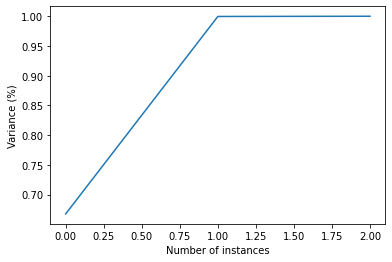

In [161]:
scaler = StandardScaler()
x_transformed = scaler.fit_transform(x)
pca = PCA()
principle_components = pca.fit_transform(x_transformed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of instances")
plt.ylabel("Variance (%)")
plt.show()

from above figure we can say that 100 % of my data can be explained by 2 columns. Considering Store_Area, Items_Available are highly correlated either we can drop any one of them or just do dimmensionality reduction

First Lets see relation between independent and dependent variables

In [162]:
df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [165]:
px.scatter(df, y="Store_Sales",x= "Daily_Customer_Count")

In [ ]:
px.scatter(df, y="",x= "Daily_Customer_Count")

In [127]:
x.drop(['Store_Area'], axis=1, inplace=True)

In [128]:
ml = multicol(x)
ml

,Features,VIF
0,Items_Available,1.001648
1,Daily_Customer_Count,1.001648
